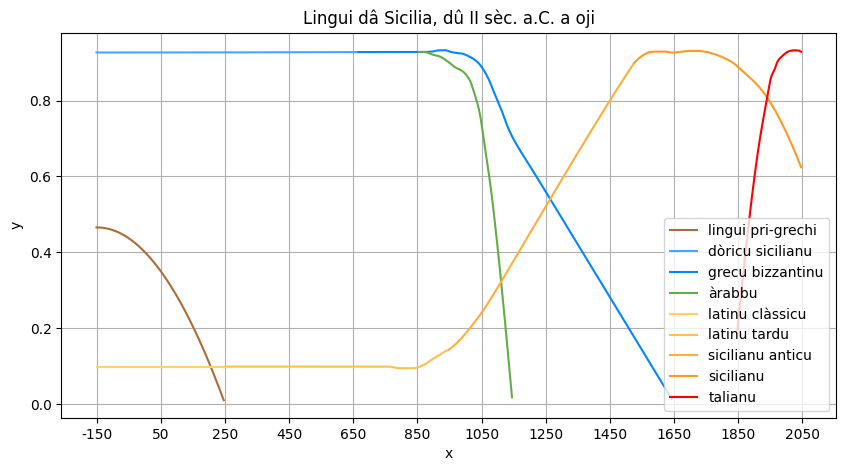

In [4]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Time
x = np.linspace(0.0, 1.0, 1000)
centuries = np.linspace(-150, 2050, 1000)

# Data
data = {
    "lingui pri-grechi": (
        [0.0000, 0.0009, 0.1810],
        [0.4655, 0.4655, 0.0056]
    ),
    "dòricu sicilianu": (
        [0.0000, 0.0028, 0.3704],
        [0.9269, 0.9269, 0.9280]
    ),
    "grecu bizzantinu": (
        [0.3704, 0.4533, 0.4637, 0.4753, 0.4844, 0.4940, 0.5019, 0.5097, 0.5182, 0.5266, 0.5351, 0.5417, 0.5484, 0.5562, 0.5623, 0.5744, 0.5822, 0.5889, 0.5967, 0.610, 0.6251, 0.6487, 0.8154],
        [0.9280, 0.9283, 0.9283, 0.9293, 0.9325, 0.9329, 0.9284, 0.9257, 0.9239, 0.9176, 0.9086, 0.8978, 0.8806, 0.8536, 0.8256, 0.7715, 0.7319, 0.7048, 0.6787, 0.639, 0.5939, 0.5218, 0.0115]
    ),
    "àrabbu": (
        [0.4562, 0.4647, 0.4760, 0.4854, 0.4967, 0.5071, 0.5184, 0.5287, 0.5344, 0.5429, 0.5485, 0.5589, 0.5674, 0.5768, 0.5834, 0.5891], 
        [0.9283, 0.9283, 0.9212, 0.9170, 0.9044, 0.8889, 0.8776, 0.8537, 0.8242, 0.7665, 0.6976, 0.5640, 0.4262, 0.2532, 0.121, 0.007]
    ),
    "latinu clàssicu": (
        [0.0000, 0.1822], 
        [0.0985, 0.0985]
    ),
    "latinu tardu": (
        [0.1822, 0.4128, 0.4288, 0.4402, 0.4486, 0.4599, 0.4674, 0.4747, 0.4831, 0.4928, 0.4986],
        [0.0985, 0.0985, 0.0942, 0.0942, 0.0942, 0.0999, 0.1071, 0.1170, 0.1260, 0.1377, 0.1428]
    ),
    "sicilianu anticu": (
        [0.4986, 0.4989, 0.5399, 0.5665, 0.5949, 0.7435, 0.7617],
        [0.1428, 0.1431, 0.2261, 0.3018, 0.3911, 0.8482, 0.8996]
    ),
    "sicilianu": (
        [0.7617, 0.7756, 0.7846, 0.7943, 0.8052, 0.8160, 0.8263, 0.8396, 0.8523, 0.8638, 0.8777, 0.8904, 0.9018, 0.9115, 0.9212, 0.9345, 0.9465, 0.9641, 0.9985], 
        [0.8996, 0.9212, 0.9284, 0.9293, 0.9293, 0.9266, 0.9284, 0.9311, 0.9311, 0.9284, 0.9212, 0.9113, 0.8996, 0.8842, 0.8680, 0.8446, 0.8175, 0.7643, 0.6219]
    ),
    "talianu": (
        [0.9076, 0.9105, 0.9227, 0.9378, 0.9500, 0.9557, 0.9604, 0.9651, 0.9727, 0.9781, 0.9829, 0.9887, 0.9945, 0.9984],
        [0.1885, 0.2447, 0.4571, 0.6765, 0.8073, 0.8622, 0.8819, 0.9044, 0.9198, 0.9277, 0.9313, 0.9327, 0.9320, 0.9284]
    )
}

# Interpolation
interpolated_data = {}
for tongue, (x_points, y_points) in data.items():
    interpolator = PchipInterpolator(x_points, y_points)
    y_interp = interpolator(x)
    y_interp[y_interp < 0.0] = 0.0  # no negative values
    y_interp[x < min(x_points)] = 0.0
    y_interp[x > max(x_points)] = 0.0
    interpolated_data[tongue] = y_interp

# Check
def replace_zeros_with_nan(y_values):
    y_values = np.array(y_values)
    y_values[y_values == 0] = np.nan
    return y_values

plt.figure(figsize=(10, 5))
colors = [
    # brown
    '#AD6C35',
    # blues
    '#43A7FD',
    '#0286FD',
    # green
    '#64AD44',
    # oranges
    '#FFD166',
    '#FFBF4F',
    '#FFAE39',
    '#FF991F',
    # red
    'red',
]
for (tongue, y_values), color in zip(interpolated_data.items(), colors):
    plt.plot(x, replace_zeros_with_nan(y_values), label=tongue, linestyle="solid", color=color)

n_ticks = 12
tick_positions = np.linspace(min(x), max(x), n_ticks)
tick_labels = np.linspace(min(centuries), max(centuries), n_ticks)
plt.xticks(tick_positions, [f"{int(t)}" for t in tick_labels])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Lingui dâ Sicilia, dû II sèc. a.C. a oji")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/mt/zyn6947x2hd43nqjjng1jyrh0000gn/T/ipykernel_32051/3464437850.py:3: RuntimeWarning: invalid value encountered in divide
  normalized_data = {tongue: y_values / y_total for tongue, y_values in interpolated_data.items()}


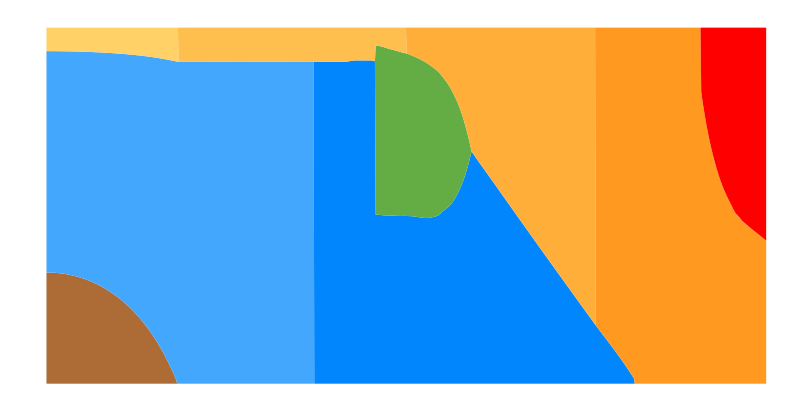

In [5]:
# Normalise
y_total = sum(interpolated_data.values())
normalized_data = {tongue: y_values / y_total for tongue, y_values in interpolated_data.items()}

full_stack = np.array(list(normalized_data.values()))
full_stack_cumsum = np.cumsum(full_stack, axis=0)

# Stack
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
for i, (tongue, color) in enumerate(zip(interpolated_data.keys(), colors)):
    plt.fill_between(x, full_stack_cumsum[i-1] if i > 0 else 0, full_stack_cumsum[i], color=color, label=tongue, linewidth=0)

ax.set_xticks([])
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
# ax.set_xticklabels([])
# plt.xticks(tick_positions, [f"" for t in tick_labels])
ax.set_yticks([])
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
fig.patch.set_alpha(0)
fig.savefig("./basi-pi-canva.png", dpi=300, bbox_inches='tight', transparent=True)